# Plotting input data

In [ ]:
import tables
import numpy as np
# A quick raster plot for one of the samples
import matplotlib.pyplot as plt

hdf5_file_path = './data/shd_test.h5'

fileh = tables.open_file(hdf5_file_path, mode='r')
units = fileh.root.spikes.units
times = fileh.root.spikes.times
labels = fileh.root.labels
# This is how we access spikes and labels
index = 0
print("Times (ms):", times[index])
print("Unit IDs:", units[index])
print("Label:", labels[index])

fig = plt.figure(figsize=(16,4))
idx = np.random.randint(len(times),size=3)
for i,k in enumerate(idx):
    ax = plt.subplot(1,3,i+1)
    ax.scatter(times[k],700-units[k], color="k", alpha=0.33, s=2)
    ax.set_title("Label %i"%labels[k])
    #ax.axis("off")
plt.show()

In [ ]:
print(times[current_index][2000])
print(units[current_index][2000])

In [ ]:
fig = plt.figure(figsize=(16,4))
current_index = 2222

ax = plt.subplot(1,3,i+1)
ax.scatter(times[current_index],700-units[current_index], color="k", alpha=0.33, s=2)
ax.set_title("Label %i"%labels[current_index])
#ax.axis("off")
plt.show()

In [ ]:
for index, time in enumerate(times):
    print(len(time), len(units[index]))
    print(time, units[index])

In [ ]:
fileh.root.extra.keys[12]

In [ ]:
import numpy as np
from utils import get_train_test_data

x_train, y_train, x_test, y_test = get_train_test_data()  

np.array(y_train).max()

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

index = 1

# Example data
timestamps = x_train['times'][index]
values = x_train['units'][index]
label = y_train[index]

print('Label = ', label)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(timestamps, values)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Value Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
from utils import sparse_data_generator_from_hdf5_spikes

train_data_generator = list(sparse_data_generator_from_hdf5_spikes(x_train, y_train,
                                       batch_size=1,
                                       nb_steps=number_time_steps,
                                       nb_units=number_input_neurons,
                                       max_time=max_time,
                                       device=device))

test_data_generator = list(sparse_data_generator_from_hdf5_spikes(x_test, y_test,
                                       batch_size=1,
                                       nb_steps=number_time_steps,
                                       nb_units=number_input_neurons,
                                       max_time=max_time,
                                       device=device))

In [ ]:
def create_svm_data_representation(data_generator):
    X = []
    Y = []

    count = 1
    end_length = len(data_generator)

    for x,y in data_generator[:100]:
        sample_vector = []
        x_dense = x.to_dense()[0]

        for neuron in range(number_input_neurons):
            summed = x_dense[:, neuron].sum().item()
            sample_vector.append(summed)
        
        X.append(sample_vector)
        Y.append(y.item())

        print(count/end_length)
        count +=1

    return X, Y

In [ ]:
X_svm_train_data, y_svm_train_data = create_svm_data_representation(train_data_generator)
X_svm_test_data, y_svm_test_data = create_svm_data_representation(test_data_generator)

In [ ]:
neuron = 19
time_step = 2
batch = 0

x.to_dense()[batch][time_step][neuron]


In [ ]:
len(data_generator)

In [ ]:
X = []
Y = []

count = 1
end_length = len(data_generator)

for x, y in data_generator[:100]:
    sample_vector = []
    x_dense = x.to_dense()[0]

    for neuron in range(number_input_neurons):
        summed = 0
        for time_step in range(number_time_steps):
            summed = summed + x_dense[time_step][neuron].item()
            

        sample_vector.append(summed)
    
    X.append(sample_vector)
    Y.append(y.item())

    print(count/end_length)
    count +=1

In [ ]:
X

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_svm_train_data, y_svm_train_data)

y_pred = clf.predict(X_svm_test_data)
accuracy = accuracy_score(y_svm_test_data, y_pred)

print(f"Accuracy: {accuracy:.2f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x,y = data_generator[0]
data = x.to_dense()[0]

# Get coordinates of all 1s
times, neurons = np.where(data == 1)

print('label = ', y)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(times, neurons, s=10, color='black')  # s controls dot size
plt.xlabel('Timestep')
plt.ylabel('Neuron')
plt.title('Neuron Activity Raster Plot')
plt.xlim(0, number_time_steps)
#plt.gca().invert_yaxis()  # Optional: place neuron 0 at top
plt.tight_layout()
plt.show()


# Debugging

In [ ]:
def get_mini_batch(x_data, y_data, shuffle=False):
    for ret in sparse_data_generator_from_hdf5_spikes(x_data, y_data, 
                                                      batch_size=batch_size, 
                                                      nb_steps=number_time_steps, 
                                                      nb_units=number_input_neurons, 
                                                      max_time=max_time,
                                                      device=device,
                                                      shuffle=shuffle):
        return ret 

In [ ]:
x_batch, y_batch = get_mini_batch(x_test, y_test)
output, other_recordings = run_snn(x_batch.to_dense(), 
                                   batch_size=batch_size,
                                   nb_hidden=number_hidden_neurons,
                                   nb_steps=number_time_steps,
                                   nb_outputs=number_output_neurons,
                                   device=device,
                                   dtype=dtype,
                                   alpha=alpha,
                                   beta=beta,
                                   weights=weights)

mem_rec, spk_rec = other_recordings

In [ ]:
# spk_rec[batch][timestep][neuron]
# in total 200 neurons because we are looking at the hidden layer here

In [ ]:
fig=plt.figure(dpi=100)
plot_voltage_traces(output)

In [ ]:
# Let's plot the hiddden layer spiking activity for some input stimuli

nb_plt = 4
gs = GridSpec(1,nb_plt)
fig= plt.figure(figsize=(7,3),dpi=150)
for i in range(nb_plt):
    plt.subplot(gs[i])
    plt.imshow(spk_rec[i].detach().cpu().numpy().T,cmap=plt.cm.gray_r, origin="lower" )
    if i==0:
        plt.xlabel("Time")
        plt.ylabel("Units")

    sns.despine()

In [ ]:
with torch.no_grad():
  net.eval()
  for data, targets in test_loader:
    data = data.to(device)
    targets = targets.to(device)

    # forward pass
    test_spk, _ = net(data.view(data.size(0), -1))

    # calculate total accuracy
    _, predicted = test_spk.sum(dim=0).max(1)
    total += targets.size(0)
    correct += (predicted == targets).sum().item()

# can the same result as with the sparse data generator be achieved with a tonic pipeline?
- comparing the plot formed by the sparse data generator with the plot after the tonic dataloader

In [ ]:
from utils import get_train_test_data, sparse_data_generator_from_hdf5_spikes, get_device

number_time_steps = 100
number_input_neurons = 700
max_time = 1.4
device = get_device()

x_train, y_train, x_test, y_test = get_train_test_data()    

train_data_generator = list(sparse_data_generator_from_hdf5_spikes(x_train, y_train,
                                       batch_size=1,
                                       nb_steps=number_time_steps,
                                       nb_units=number_input_neurons,
                                       max_time=max_time,
                                       device=device))

In [74]:
x,y = train_data_generator[0]

x.to_dense()[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

label [11]


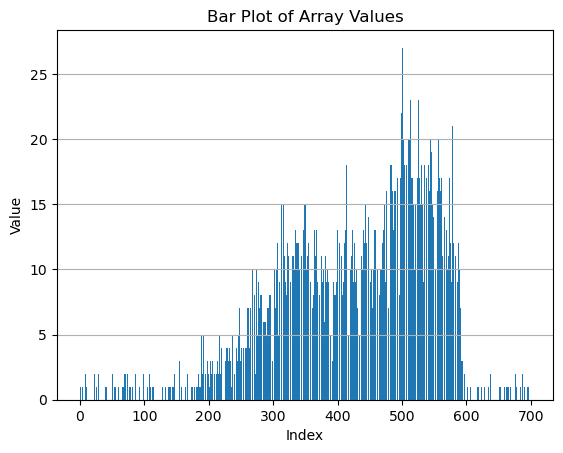

In [67]:
from train_svm import create_svm_data_representation
import numpy as np
import matplotlib.pyplot as plt

number_of_spikes_each_neuron, label = create_svm_data_representation(train_data_generator[:1])

# Example array
values = number_of_spikes_each_neuron[0]

indices = np.arange(len(number_of_spikes_each_neuron[0]))

print('label', label)

# Create the bar plot
plt.bar(indices, values)

# Label the axes
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Plot of Array Values')

# Optionally, put grid and show
plt.grid(axis='y')
plt.show()


In [ ]:
from tonic import transforms, datasets

number_steps = 100 

frame_transform = transforms.ToFrame(
    sensor_size=datasets.SHD.sensor_size,  
    n_time_bins=number_steps
)


In [ ]:
from torch.utils.data import DataLoader
from tonic import datasets

dense_dataset = datasets.SHD("./data", transform=frame_transform, train=True)

naive_dataloader = DataLoader(dense_dataset, shuffle=False, batch_size=1)

dataloader_list = list(naive_dataloader)

label 11


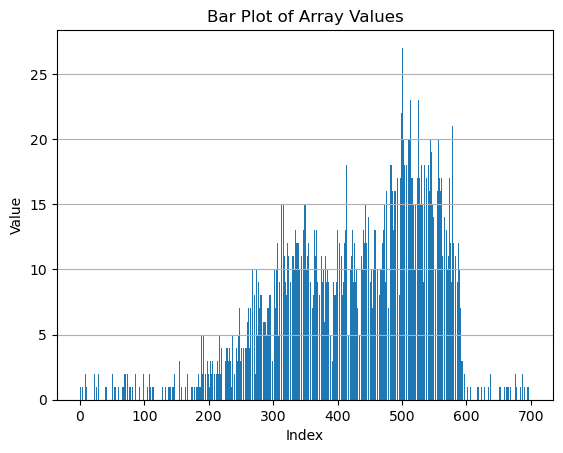

In [78]:
X = []
Y = []
sample_vector = []


number_input_neurons = 700

x,y = dataloader_list[0]

x_dense = x.squeeze().to_dense()

for neuron in range(number_input_neurons):
    summed = x_dense[:, neuron].sum().item()
    sample_vector.append(summed)

values = sample_vector
Y = y.item()

# Example array
#values = number_of_spikes_each_neuron[0]

indices = np.arange(len(values))

print('label', Y)

# Create the bar plot
plt.bar(indices, values)

# Label the axes
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Plot of Array Values')

# Optionally, put grid and show
plt.grid(axis='y')
plt.show()

In [61]:
for index, value in enumerate(naive_dataloader):
    x, y = value

    print(x.shape, y)

torch.Size([1, 100, 1, 700]) tensor([11])
torch.Size([1, 100, 1, 700]) tensor([13])
torch.Size([1, 100, 1, 700]) tensor([5])
torch.Size([1, 100, 1, 700]) tensor([10])
torch.Size([1, 100, 1, 700]) tensor([1])
torch.Size([1, 100, 1, 700]) tensor([13])
torch.Size([1, 100, 1, 700]) tensor([4])
torch.Size([1, 100, 1, 700]) tensor([14])
torch.Size([1, 100, 1, 700]) tensor([6])
torch.Size([1, 100, 1, 700]) tensor([0])
torch.Size([1, 100, 1, 700]) tensor([11])
torch.Size([1, 100, 1, 700]) tensor([17])
torch.Size([1, 100, 1, 700]) tensor([5])
torch.Size([1, 100, 1, 700]) tensor([9])
torch.Size([1, 100, 1, 700]) tensor([12])
torch.Size([1, 100, 1, 700]) tensor([12])
torch.Size([1, 100, 1, 700]) tensor([5])
torch.Size([1, 100, 1, 700]) tensor([0])
torch.Size([1, 100, 1, 700]) tensor([14])
torch.Size([1, 100, 1, 700]) tensor([5])
torch.Size([1, 100, 1, 700]) tensor([9])
torch.Size([1, 100, 1, 700]) tensor([5])
torch.Size([1, 100, 1, 700]) tensor([15])
torch.Size([1, 100, 1, 700]) tensor([15])
torc

# Applying for simplified snn

In [1]:
import snntorch as snn
from snntorch import functional as SF
import torch.nn as nn
from utils import sparse_data_generator_from_hdf5_spikes, get_train_test_data, save_history_plot
import torch
from utils import get_device
import numpy as np
from torch.utils.data import DataLoader
from tonic import datasets, transforms

def compute_test_set_accuracy(test_data_generator, net):
    total = 0
    correct = 0

    with torch.no_grad():
        net.eval()
        for data, targets in test_data_generator:
            data = data.to_dense().permute(1, 0, 2).to(device)
            targets = targets.to(device)

            test_spk, _ = net(data)

            _, predicted = test_spk.sum(dim=0).max(1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()


    return 100 * correct / total

time_steps = 100
num_inputs = 700
num_hidden = 1000
num_outputs = 20
dtype = torch.float
batch_size = 32

max_time = 1.4
beta = 0.99
device = get_device()

frame_transform = transforms.ToFrame(
    sensor_size=datasets.SHD.sensor_size,  
    n_time_bins=time_steps
)

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize layers
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = snn.Leaky(beta=beta)

    def forward(self, x):

        # Initialize hidden states at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()

        # Record the final layer
        spk2_rec = []
        mem2_rec = []

        for step in range(time_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            spk2_rec.append(spk2)
            mem2_rec.append(mem2)

        return torch.stack(spk2_rec, dim=0), torch.stack(mem2_rec, dim=0)

x_train, y_train, x_test, y_test = get_train_test_data()    

train_data_generator = list(sparse_data_generator_from_hdf5_spikes(x_train, y_train,
                                    batch_size=batch_size,
                                    nb_steps=time_steps,
                                    nb_units=num_inputs,
                                    max_time=max_time,
                                    device=device))

test_data_generator = list(sparse_data_generator_from_hdf5_spikes(x_test, y_test,
                                    batch_size=1,
                                    nb_steps=time_steps,
                                    nb_units=num_inputs,
                                    max_time=max_time,
                                    device=device))

print("data generated")

train_data = datasets.SHD("./data", transform=frame_transform, train=True)
test_data = datasets.SHD("./data", transform=frame_transform, train=False)

print('prepare data')
train_data_loader = DataLoader(train_data, shuffle=False, batch_size=batch_size)
test_data_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)


/home/mark/anaconda3/envs/whk-snn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mark/Dokumente/whk-snn/whk-snn/heidelberg_implementation/utils.py:186: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1744233411441/work/torch/csrc/utils/tensor_new.cpp:644.)
  X_batch = torch.sparse.FloatTensor(i, v, torch.Size([batch_size,nb_steps,nb_units])).to(device)


data generated
prepare data


In [14]:
data, target = train_data_generator[0]

data.to_dense().type()

'torch.FloatTensor'

In [19]:
x.to(torch.float32).type()

'torch.FloatTensor'

In [3]:
x,y = list(train_data_loader)[0]

In [20]:

net = Net().to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=5e-4, betas=(0.9, 0.999))
loss = nn.CrossEntropyLoss()

num_epochs = 30

global_loss_hist = []
global_acc_hist = []

for epoch in range(num_epochs):
    print(f"Epoch: {epoch}")

    for i, (data, targets) in enumerate(train_data_loader):
        loss_hist = []
        acc_hist = []

        data = data.to_dense().to(torch.float32).squeeze().permute(1, 0, 2).to(device)
        targets = targets.to(device)

        spk_rec, mem_rec = net(data)
        loss_val = torch.zeros((1), dtype=dtype, device=device)

        # sum loss at every step
        for step in range(time_steps):
            loss_val += loss(mem_rec[step], targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        acc = SF.accuracy_rate(spk_rec, targets)

        global_loss_hist.append(loss_val.item())
        global_acc_hist.append(acc)
        loss_hist.append(loss_val.item())
        acc_hist.append(acc)
        
    print(f"average loss {np.array(loss_hist).mean()}")
    print(f"average accuracy {np.array(acc_hist).mean()}")

save_history_plot(global_loss_hist, name='simplified_loss')
save_history_plot(global_acc_hist, name='simplified_accuracy')

test_set_accuracy = compute_test_set_accuracy(test_data_generator, net)
print(f"Test Set Accuracy: {test_set_accuracy:.2f}%")



Epoch: 0


KeyboardInterrupt: 